In [357]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Don't worry about this one
%matplotlib inline

# <center>Week 8 - Maximum Likelihood and Classification</center>

# Likelihood 1: Normal Case

<b>Definitions</b>

Consider:

$Y \sim \mathcal{N}(\mu, \sigma^2)$

We can think of the relationship between $y$, $\mu$, $\sigma^2$ in two ways.

+ As a *probability*, mapping the data value $y$ to a real number, taking parameters $\mu, \sigma^2$ as given.

+ As a *likelihood*, mapping parameters $\mu, \sigma^2$  to a real number, taking the data value $y$ as given.

<b>Discuss</b> In the *iid* case, how can we decompose $P(y_{1}, \cdots , y_{n}; \mu, \sigma^2)$?

Recall that the pdf of the normal distribution is:

$$P(y_{1}; \mu, \sigma^2) = ?!?!?!$$

In [358]:
def normal_pdf(y, mu = 0, sigmasq = 1):
    return np.exp(-(y - mu)**2/(2*sigmasq))/np.sqrt(2*np.pi*sigmasq)

Now create a function that returns the *negative log-likelihood*.

In [307]:
def neg_log_likelihood(y, mu = 0, sigmasq = 1):
    return  -np.sum(np.log(normal_pdf(y, mu, sigmasq)))

Test out the function below for different value of $\mu$, $\sigma^2$. 

+ Does the output behave as you thought it would?

+ Where does the function seem to attain its minimum?

In [399]:
# Drawing some data so we can test the function
y = np.random.normal(loc = 2, scale = np.sqrt(5), size = (1000, 1))  # Note the parameters!

# Now choose *different* parameters to see how the likelihood varies
mu = 3
sigmasq = 20

nll = neg_log_likelihood(y, mu = mu, sigmasq = sigmasq)
print("The negative log-likelihood is L(mu = {0}, sigma^2 = {1}; y) = {2}".format(mu, sigmasq, nll))

The negative log-likelihood is L(mu = 3, sigma^2 = 20; y) = 2566.9103779601473


<b>Finding the maximum likelihood estimator</b>

Use the minimize function from scipy.optimize (imported as 'opt' above) to find the maximum likelihood estimators of $\mu$ and $\sigma^2$.

In [400]:
opt.minimize(lambda p: neg_log_likelihood(y, p[0], p[1]),  # Why did I define this lambda function?
             x0 = [0,1], 
             bounds = ((None, None), (.01, None)))  # Can you guess what the "bounds" argument does?

      fun: 2209.871332459838
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  0.00000000e+00,   4.54747351e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 39
      nit: 12
   status: 0
  success: True
        x: array([ 1.93219534,  4.86402189])

<b>Discussion</b> 

+ The negative log-likelihood function happens to be convex. Why is that important?

+ How could we modify this to have the mean depend on some other variable $x$?

<b>Figures</b>

*Don't worry about the code in the next cell. You are not required to know it.*

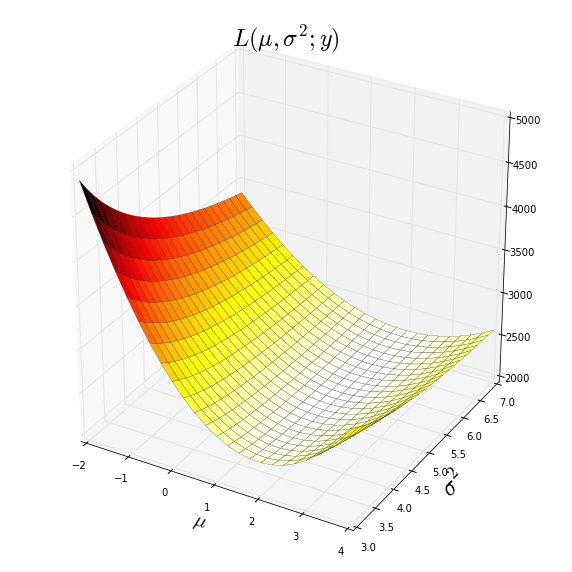

In [401]:
from mpl_toolkits.mplot3d import Axes3D

y = np.random.normal(loc = 2, scale = np.sqrt(5), size = (1000, 1))  # Note the parameters!

n_pts = 25
m = np.linspace(-2, 4, n_pts)
s = np.linspace(3, 7, n_pts)
mus, sigmasqs = np.meshgrid(m, s)
nll = np.zeros((n_pts, n_pts))
for i in range(n_pts):
    for j in range(n_pts):
        nll[i,j] = neg_log_likelihood(y, mus[i,j], sigmasqs[i,j])

fig = plt.figure(figsize = (10, 10))
ax = fig.gca(projection='3d')

ax.plot_surface(mus, sigmasqs, nll, rstride= 1, cstride= 1, 
                cmap=plt.cm.hot_r,
                linewidth= .2, 
                antialiased= True)

ax.set_xlabel("$\mu$", fontsize = 20)
ax.set_ylabel("$\sigma^2$", fontsize = 24)
ax.set_title("$L(\mu, \sigma^2; y)$", fontsize = 24)

plt.show()

<hr>

# Likelihood 2: Logistic (Bernoulli + Sigmoid + Linear)

Write a function that outputs the Bernoulli pdf. Use the 'trick': 

$$Bern(y_{1} | \mu) = \mu^{y_{1}} (1 - \mu)^{1 - y_{1}}$$

In [403]:
def bernoulli_pdf(y, mu):
    return mu**y * (1 - mu)**(1 - y)

<b>Bernoulli negative log-likelihood</b>

In [404]:
def neg_log_likelihood(y, mu = .5):
    return -np.sum(np.log(bernoulli_pdf(y, mu))) 

Minimize with respect to $\mu$.

In [413]:
y = np.random.binomial(n = 1, p = .3, size = (1000, 1))

opt.minimize(lambda mu: neg_log_likelihood(y, mu), 
             x0 = np.array([.5]), 
             bounds = [(.001, .999)] )  # Why do we need the 'bounds' argument this time?

      fun: 615.86269719298616
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([  4.54747351e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 12
      nit: 4
   status: 0
  success: True
        x: array([ 0.306])

## Making the $y$ depend on $x$

We will make $\mu$ a function of $x$, and we will use the simplest function we can think of.

In [414]:
def linear(x, a, b):
    return a + b*x

This function cannot be used as it is to model $\mu$, obviously [right?]. So let's constrain its range.

In [415]:
def sigmoid(z): # AKA 'logistic'
    return 1/(1 + np.exp(-z))

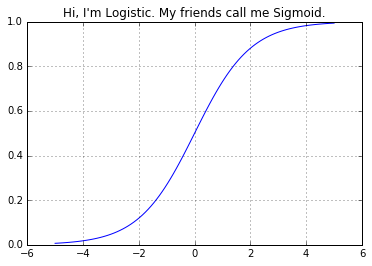

In [416]:
zs = np.linspace(-5, 5, 100)
plt.plot(zs, sigmoid(zs))
plt.title("Hi, I'm Logistic. My friends call me Sigmoid.")
plt.grid()

Let's simulate some data 

In [417]:
x = np.random.uniform(low = -5, high = 5, size = (5000, 1))
mu_x = sigmoid(linear(x, 1, 3))
y = np.random.binomial(n = 1, p = mu_x)  # Note this generates *one* y for *each* x!

Find the $a$, $b$ that minimize the negative log-likelihood.

In [418]:
opt.minimize(lambda p: neg_log_likelihood(y, sigmoid(linear(x, p[0], p[1]))), 
             x0 = np.array([0, 1]))  # Why do we need the 'bounds' argument this time?

/Users/vitorhadad/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/Users/vitorhadad/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/Users/vitorhadad/anaconda/lib/python3.5/site-packages/scipy/optimize/optimize.py:562: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/vitorhadad/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/Users/vitorhadad/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


      fun: 548.8450112740461
 hess_inv: array([[ 0.00836988,  0.00616497],
       [ 0.00616497,  0.01594059]])
      jac: array([  7.62939453e-06,   0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 187
      nit: 11
     njev: 45
   status: 0
  success: True
        x: array([ 1.10458874,  2.94924228])

<b> Discussion<b>

+ How would you modify the code to supress the variance of the estimates of $a, b$? 

+ If you had many regressors, how would you modify the code to ensure that the estimates of $b$ are sparse?

<b>Note</b> Even if we write everything correctly, your algorithm might fail to converge. When that happens, you will get a message different from *'Optimization terminated successfully'*. This is probably happening due to numerical issues. Don't worry about them in EC3389, just re-run the code with a different starting parameters, or run it multiple times. However, if you ever write code for your own research / work, you will have to make sure your code won't fall prey to these numerical issues!